In [9]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('D:/UCO_CourseWork/Programing for analytics/ProjectProposal/25___perm.xlsx')
# df = df.iloc[:40000]
df.head()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,FOREIGN_WORKER_ALT_OCC_EXP,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_EMPL_PAY_FOR_ED,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE
0,A-22262-24149,Withdrawn,2022-10-02,2022-10-02,N,NaT,NaN,N,Westgate Shellworld Inc,7012 Muncipal Drive,...,NaN,NaN,N,N,N,FRANCES DELAFUENTE,ATTORNEY,MICHELLE@DLGPA.COM,SAMIA AHMED,OWNER
1,A-21187-12839,Certified-Expired,2022-02-03,2022-10-03,N,NaT,NaN,N,"NIKE, INC.",ONE BOWERMAN DRIVE,...,Y,N,N,Y,N,Chad T Li,Associate Attorney,chad.li@BAL.com,Diana Loveless,Immigration Program Consultant
2,A-21327-77110,Denied,2021-11-30,2022-10-03,N,NaT,NaN,N,RIVERY TECHNOLOGIES INC,500 7TH AVENUE,...,Y,N,N,Y,N,Rakhel S Milstein,Attorney,rsm@milsteinlg.com,Aviv Noy,CoFounder
3,A-21342-83195,Certified-Expired,2022-02-03,2022-10-03,N,NaT,NaN,N,ESRI INC.,380 NEW YORK ST.,...,Y,N,N,Y,N,Jessica L Cross,Attorney,jessica.cross@ogletree.com,Vinesh Patel,Global Mobility Coordinator
4,A-21349-86725,Certified-Expired,2022-02-03,2022-10-03,N,NaT,NaN,N,INGURAN LLC DBA STGENETICS,22575 STATE HWY 6 SOUTH,...,NaN,N,N,Y,N,Beatriz Trillos Ballerini,Attorney,perm@tbvisas.com,Steven Sfamenos,Human Resources Director


In [3]:
df.shape

(25000, 154)

In [4]:
# Display the first few rows of the df
set and its columns to understand its structure
df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE',
       'REFILE', 'ORIG_FILE_DATE', 'PREVIOUS_SWA_CASE_NUMBER_STATE',
       'SCHD_A_SHEEPHERDER', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS_1',
       ...
       'FOREIGN_WORKER_ALT_OCC_EXP', 'FOREIGN_WORKER_EXP_WITH_EMPL',
       'FOREIGN_WORKER_EMPL_PAY_FOR_ED', 'FOREIGN_WORKER_CURR_EMPLOYED',
       'EMPLOYER_COMPLETED_APPLICATION', 'PREPARER_NAME', 'PREPARER_TITLE',
       'PREPARER_EMAIL', 'EMP_INFO_DECL_NAME', 'EMP_DECL_TITLE'],
      dtype='object', length=154)

## 1. What is the distribution of CASE_STATUS?

In [6]:
# Displaying the count of each case status
case_status_distribution = df['CASE_STATUS'].value_counts()
print(case_status_distribution)


CASE_STATUS
Certified-Expired    22098
Withdrawn             1509
Denied                1393
Name: count, dtype: int64


## 2. Distribution of CASE_STATUS over time

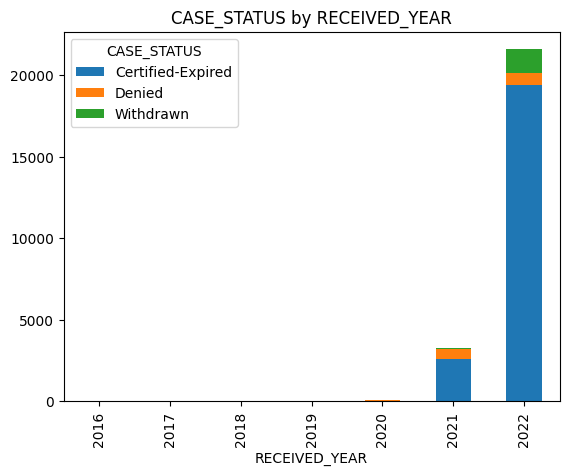

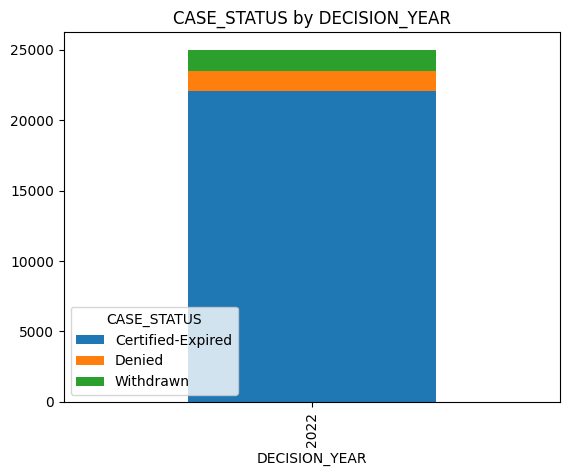

In [11]:
# Assuming 'RECEIVED_DATE' and 'DECISION_DATE' are already converted to datetime objects
# Plotting CASE_STATUS distribution over time
df['RECEIVED_YEAR'] = df['RECEIVED_DATE'].dt.year
df['DECISION_YEAR'] = df['DECISION_DATE'].dt.year

received_distribution = df.groupby('RECEIVED_YEAR')['CASE_STATUS'].value_counts().unstack()
decision_distribution = df.groupby('DECISION_YEAR')['CASE_STATUS'].value_counts().unstack()

received_distribution.plot(kind='bar', stacked=True, title='CASE_STATUS by RECEIVED_YEAR')
decision_distribution.plot(kind='bar', stacked=True, title='CASE_STATUS by DECISION_YEAR')
plt.show()


## Convert to date and time

In [15]:
# Convert date columns to datetime format
df['RECEIVED_DATE'] = pd.to_datetime(df['RECEIVED_DATE'])
df['DECISION_DATE'] = pd.to_datetime(df['DECISION_DATE'])

## 3. Average processing time

In [24]:
# Calculate processing time and find average
df['PROCESSING_TIME'] = (df['DECISION_DATE'] - df['RECEIVED_DATE']).dt.days
average_processing_time = df['PROCESSING_TIME'].mean()
print(f'Average Processing Time: {average_processing_time} days')

Average Processing Time: 268.3674 days


## 4. Decision outcomes based on country of citizenship

In [41]:
# Exploring decision patterns by country
patterns_by_country = df.groupby('COUNTRY_OF_CITIZENSHIP')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(patterns_by_country)

CASE_STATUS             Certified-Expired    Denied  Withdrawn
COUNTRY_OF_CITIZENSHIP                                        
AFGHANISTAN                      1.000000       NaN        NaN
ALBANIA                          0.730769  0.269231        NaN
ALGERIA                          1.000000       NaN        NaN
ANGOLA                           0.500000  0.500000        NaN
ANTIGUA AND BARBUDA              1.000000       NaN        NaN
...                                   ...       ...        ...
VENEZUELA                        0.766423  0.145985   0.087591
VIETNAM                          0.798479  0.068441   0.133080
YEMEN                            1.000000       NaN        NaN
ZAMBIA                           0.681818  0.318182        NaN
ZIMBABWE                         0.720000  0.280000        NaN

[155 rows x 3 columns]


## 5. Number of applications certified vs. denied

In [42]:
# Counting certified and denied applications
certified_denied_count = df['CASE_STATUS'].isin(['Certified', 'Denied']).value_counts()
print(certified_denied_count)


CASE_STATUS
False    23607
True      1393
Name: count, dtype: int64


## 6. Distribution of PW_WAGE

In [45]:
# Analyzing the wage distribution
wage_distribution = df['PW_WAGE'].describe()
print(wage_distribution)

count     24992.000000
mean      89749.249462
std       42821.995854
min           8.000000
25%       60570.000000
50%       93558.000000
75%      119350.000000
max      637000.000000
Name: PW_WAGE, dtype: float64


## 7. Correlation between PW_WAGE and PW_UNIT_OF_PAY

In [46]:
# Checking for correlation
wage_unit_pivot = pd.pivot_table(df, values='PW_WAGE', index='PW_UNIT_OF_PAY', aggfunc='mean')
print(wage_unit_pivot.corr())


         PW_WAGE
PW_WAGE      1.0


## 8. PW_WAGE distribution across different industries

In [48]:
# Wage distribution by industry
industry_wage_distribution = df.groupby('NAICS_CODE')['PW_WAGE'].describe()
print(industry_wage_distribution)


            count           mean           std       min        25%       50%   
NAICS_CODE                                                                      
23            1.0   79227.000000           NaN   79227.0   79227.00   79227.0  \
42            1.0   42598.000000           NaN   42598.0   42598.00   42598.0   
61            1.0   64896.000000           NaN   64896.0   64896.00   64896.0   
221           1.0  124925.000000           NaN  124925.0  124925.00  124925.0   
311           1.0   27498.000000           NaN   27498.0   27498.00   27498.0   
...           ...            ...           ...       ...        ...       ...   
926120        3.0   89003.000000  45799.508764   56014.0   62857.50   69701.0   
926130        2.0   82066.500000  25489.078141   64043.0   73054.75   82066.5   
928120        2.0   72228.000000  22075.873709   56618.0   64423.00   72228.0   
31-33         3.0   86125.666667  38169.979386   42078.0   74443.00  106808.0   
44-45         1.0   65000.00

## 9. Prevailing wage source distribution

In [49]:
# Count of different wage sources
wage_source_distribution = df['PW_WAGE_SOURCE'].value_counts()
print(wage_source_distribution)

PW_WAGE_SOURCE
OES                   23574
Other                  1280
CBA                      98
Employer Conducted       32
SCA                       4
DBA                       3
Name: count, dtype: int64


## 10. PW_WAGE by prevailing wage source

In [50]:
# Average wage by source
wage_by_source = df.groupby('PW_WAGE_SOURCE')['PW_WAGE'].mean()
print(wage_by_source)


PW_WAGE_SOURCE
CBA                    51671.048061
DBA                    22053.000000
Employer Conducted     18137.938438
OES                    88776.790794
Other                 112801.680094
SCA                    23168.280000
Name: PW_WAGE, dtype: float64


## 11. Distribution of MINIMUM_EDUCATION

In [51]:
# Counting levels of education
education_distribution = df['MINIMUM_EDUCATION'].value_counts()
print(education_distribution)


MINIMUM_EDUCATION
Master's       9662
Bachelor's     9130
High School    1257
Other           646
Doctorate       567
Associate's     142
Name: count, dtype: int64


## 12. Relationship between MINIMUM_EDUCATION and REQUIRED_EXPERIENCE

In [52]:
# Exploring relationship between education and experience
education_experience_relationship = pd.crosstab(df['MINIMUM_EDUCATION'], df
['REQUIRED_EXPERIENCE'])
print(education_experience_relationship)


REQUIRED_EXPERIENCE     N     Y
MINIMUM_EDUCATION              
Associate's            83    59
Bachelor's           3147  5983
Doctorate             465   102
High School           589   668
Master's             3511  6151
Other                 554    92


## 13. Applications requiring training

In [53]:
# Counting applications that require training
required_training_count = df['REQUIRED_TRAINING'].value_counts()
print(required_training_count)

REQUIRED_TRAINING
N    24745
Y      255
Name: count, dtype: int64


## 14. Distribution of REQUIRED_TRAINING_MONTHS

In [54]:
# Analyzing training months distribution
training_months_distribution = df['REQUIRED_TRAINING_MONTHS'].describe()
print(training_months_distribution)


count    255.000000
mean      29.988235
std       21.468982
min        0.000000
25%        6.000000
50%       36.000000
75%       36.000000
max      108.000000
Name: REQUIRED_TRAINING_MONTHS, dtype: float64


## 15. Relationship between REQUIRED_TRAINING and PW_WAGE

In [55]:
# Relationship between training requirement and wage
training_wage_relationship = df.groupby('REQUIRED_TRAINING')['PW_WAGE'].mean()
print(training_wage_relationship)


REQUIRED_TRAINING
N     89631.561263
Y    101257.108577
Name: PW_WAGE, dtype: float64


## 16. Distribution of FOREIGN_LANGUAGE_REQUIRED

In [56]:
# Counting whether foreign language is required or not
foreign_language_distribution = df['FOREIGN_LANGUAGE_REQUIRED'].value_counts()
print(foreign_language_distribution)


FOREIGN_LANGUAGE_REQUIRED
N    24789
Y      211
Name: count, dtype: int64


## 17. How FOREIGN_LANGUAGE_REQUIRED affects decision outcomes

In [ ]:
# Relationship between foreign language requirement and case status
language_case_status = df.groupby('FOREIGN_LANGUAGE_REQUIRED')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(language_case_status)


## 18. Distribution of CLASS_OF_ADMISSION

In [ ]:
# Counting entries for each class of admission
class_admission_distribution = df['CLASS_OF_ADMISSION'].value_counts()
print(class_admission_distribution)


## 19. Patterns in CLASS_OF_ADMISSION with respect to decision outcomes

In [ ]:
# Examining case status by class of admission
class_status_patterns = df.groupby('CLASS_OF_ADMISSION')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(class_status_patterns)


## 20. Applications involving layoffs in the past six months

In [ ]:
# Count of applications involving recent layoffs
layoffs_count = df['LAYOFF_IN_PAST_SIX_MONTHS'].value_counts()
print(layoffs_count)


## 21. Correlation between layoffs and decision outcomes

In [ ]:
# Exploring the relationship between recent layoffs and case status
layoffs_case_status = df.groupby('LAYOFF_IN_PAST_SIX_MONTHS')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(layoffs_case_status)


## 22. Distribution of job titles

In [ ]:
# Analyzing the frequency of different job titles
job_title_distribution = df['JOB_TITLE'].value_counts()
print(job_title_distribution)


## 23. Distribution of job titles across industries

In [ ]:
# Job title distribution by industry
job_titles_by_industry = df.groupby('NAICS_CODE')['JOB_TITLE'].value_counts().unstack()
print(job_titles_by_industry)


## 24. Distribution of ACCEPT_ALT_COMBO

In [ ]:
# Counting the acceptance of alternative combinations
accept_alt_combo_distribution = df['ACCEPT_ALT_COMBO'].value_counts()
print(accept_alt_combo_distribution)


## 25. How ACCEPT_ALT_COMBO affects decision outcomes

In [ ]:
# Relationship between ACCEPT_ALT_COMBO and CASE_STATUS
alt_combo_case_status = df.groupby('ACCEPT_ALT_COMBO')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(alt_combo_case_status)


## 26. Distribution of FOREIGN_WORKER_CURR_EMPLOYED

In [ ]:
# Counting current employment status of foreign workers
foreign_worker_employed_distribution = df['FOREIGN_WORKER_CURR_EMPLOYED'].value_counts()
print(foreign_worker_employed_distribution)


## 27. Correlation between FOREIGN_WORKER_CURR_EMPLOYED and decision outcomes

In [ ]:
# Exploring the impact of current employment of foreign workers on case status
employed_case_status = df.groupby('FOREIGN_WORKER_CURR_EMPLOYED')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(employed_case_status)


## 28. Applications filed by employers who received payment

In [ ]:
# Counting applications where employers received payment
received_payment_count = df['EMP_RECEIVED_PAYMENT'].value_counts()
print(received_payment_count)


## 29. Relationship between EMP_RECEIVED_PAYMENT and decision outcomes

In [ ]:
# Relationship between employer payment and case status
payment_case_status = df.groupby('EMP_RECEIVED_PAYMENT')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(payment_case_status)


## 30. Distribution of FOREIGN_WORKER_EDUCATION

In [ ]:
# Analyzing the education levels reported for foreign workers
foreign_worker_education_distribution = df['FOREIGN_WORKER_EDUCATION'].value_counts()
print(foreign_worker_education_distribution)

## 31. Correlation between FOREIGN_WORKER_EDUCATION and decision outcomes

In [ ]:
education_status_correlation = df.groupby('FOREIGN_WORKER_EDUCATION')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(education_status_correlation)


## 32. Differences in processing time based on FOREIGN_WORKER_EDUCATION

In [ ]:
education_processing_time = df.groupby('FOREIGN_WORKER_EDUCATION')['PROCESSING_TIME'].mean()
print(education_processing_time)


## 33. Distribution of EMPLOYER_COMPLETED_APPLICATION

In [ ]:
employer_completed_distribution = df['EMPLOYER_COMPLETED_APPLICATION'].value_counts()
print(employer_completed_distribution)


## 34. Correlation between EMPLOYER_COMPLETED_APPLICATION and decision outcomes

In [ ]:
employer_application_status = df.groupby('EMPLOYER_COMPLETED_APPLICATION')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(employer_application_status)


## 35. Difference in processing time based on EMPLOYER_COMPLETED_APPLICATION

In [ ]:
employer_application_time = df.groupby('EMPLOYER_COMPLETED_APPLICATION')['PROCESSING_TIME'].mean()
print(employer_application_time)


## 36. Distribution of PW_SKILL_LEVEL

In [ ]:
skill_level_distribution = df['PW_SKILL_LEVEL'].value_counts()
print(skill_level_distribution)


## 37. Correlation between PW_SKILL_LEVEL and decision outcomes

In [ ]:
skill_level_status = df.groupby('PW_SKILL_LEVEL')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(skill_level_status)


## 38. Patterns in processing time based on PW_SKILL_LEVEL

In [ ]:
skill_level_processing_time = df.groupby('PW_SKILL_LEVEL')['PROCESSING_TIME'].mean()
print(skill_level_processing_time)


## 39. Distribution of REQUIRED_EXPERIENCE

In [ ]:
experience_distribution = df['REQUIRED_EXPERIENCE'].value_counts()
print(experience_distribution)


## 40. Correlation between REQUIRED_EXPERIENCE and decision outcomes

In [ ]:
experience_status_correlation = df.groupby('REQUIRED_EXPERIENCE')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(experience_status_correlation)


## 41. Difference in processing time based on REQUIRED_EXPERIENCE

In [ ]:
experience_processing_time = df.groupby('REQUIRED_EXPERIENCE')['PROCESSING_TIME'].mean()
print(experience_processing_time)


## 42. Distribution of REQUIRED_EXPERIENCE_MONTHS

In [1]:
experience_months_distribution = df['REQUIRED_EXPERIENCE_MONTHS'].value_counts()
print(experience_months_distribution)


NameError: name 'data' is not defined

## 43. Effect of REQUIRED_EXPERIENCE_MONTHS on decision outcomes

In [ ]:
experience_months_status = df.groupby('REQUIRED_EXPERIENCE_MONTHS')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(experience_months_status)


## 44. Distribution of FOREIGN_WORKER_EXP_WITH_EMPL

In [ ]:
foreign_worker_experience_distribution = df['FOREIGN_WORKER_EXP_WITH_EMPL'].value_counts()
print(foreign_worker_experience_distribution)


## 45. Correlation between FOREIGN_WORKER_EXP_WITH_EMPL and decision outcomes

In [ ]:
foreign_worker_exp_status = df.groupby('FOREIGN_WORKER_EXP_WITH_EMPL')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(foreign_worker_exp_status)


## 46. Difference in processing time based on FOREIGN_WORKER_EXP_WITH_EMPL

In [ ]:
foreign_worker_exp_time = df.groupby('FOREIGN_WORKER_EXP_WITH_EMPL')['PROCESSING_TIME'].mean()
print(foreign_worker_exp_time)


## 47. Distribution of EMP_INFO_DECL_NAME

In [ ]:
decl_name_distribution = df['EMP_INFO_DECL_NAME'].value_counts()
print(decl_name_distribution)


## 48. Correlation between EMP_INFO_DECL_NAME and decision outcomes

In [ ]:
decl_name_status = df.groupby('EMP_INFO_DECL_NAME')['CASE_STATUS'].value_counts(normalize=True).unstack()
print(decl_name_status)


## 49. Difference in processing time based on who completed the employer information

In [ ]:
decl_name_processing_time = df.groupby('EMP_INFO_DECL_NAME')['PROCESSING_TIME'].mean()
print(decl_name_processing_time)


## 50. Distribution of POSTED_NOTICE_AT_WORKSITE

In [ ]:
posted_notice_distribution = df['POSTED_NOTICE_AT_WORKSITE'].value_counts()
print(posted_notice_distribution)


In [22]:



columns_to_keep = [
    'CASE_STATUS', 'RECEIVED_DATE', 'DECISION_DATE', 'COUNTRY_OF_CITIZENSHIP', 
    'PW_WAGE', 'PW_UNIT_OF_PAY', 'NAICS_CODE', 'PW_WAGE_SOURCE', 'MINIMUM_EDUCATION', 
    'REQUIRED_EXPERIENCE', 'REQUIRED_TRAINING', 'REQUIRED_TRAINING_MONTHS', 
    'FOREIGN_LANGUAGE_REQUIRED', 'CLASS_OF_ADMISSION', 'LAYOFF_IN_PAST_SIX_MONTHS', 
    'JOB_TITLE', 'ACCEPT_ALT_COMBO', 'FOREIGN_WORKER_CURR_EMPLOYED', 
    'EMP_RECEIVED_PAYMENT', 'FOREIGN_WORKER_EDUCATION', 'EMPLOYER_COMPLETED_APPLICATION', 
    'PW_SKILL_LEVEL', 'REQUIRED_EXPERIENCE_MONTHS', 'FOREIGN_WORKER_EXP_WITH_EMPL', 
    'EMP_INFO_DECL_NAME', 'POSTED_NOTICE_AT_WORKSITE'
]

# Load the df
set with only the relevant columns
df
 = pd.read_excel('D:/UCO_CourseWork/Programing for analytics/ProjectProposal/25___perm.xlsx', usecols=columns_to_keep)

In [25]:
# Convert date columns to datetime format
df['RECEIVED_DATE'] = pd.to_datetime(df['RECEIVED_DATE'])
df['DECISION_DATE'] = pd.to_datetime(df['DECISION_DATE'])

In [28]:
# Display the first few rows of the cleaned dfframe and the summary of null values
# df.head
df.isnull().sum()

CASE_STATUS                           0
RECEIVED_DATE                         0
DECISION_DATE                         0
NAICS_CODE                           17
PW_SKILL_LEVEL                     1451
PW_WAGE                               8
PW_UNIT_OF_PAY                        8
PW_WAGE_SOURCE                        9
JOB_TITLE                             1
MINIMUM_EDUCATION                  3596
REQUIRED_TRAINING                     0
REQUIRED_TRAINING_MONTHS          24745
REQUIRED_EXPERIENCE                   0
REQUIRED_EXPERIENCE_MONTHS        11048
ACCEPT_ALT_COMBO                      1
FOREIGN_LANGUAGE_REQUIRED             0
EMP_RECEIVED_PAYMENT                  1
POSTED_NOTICE_AT_WORKSITE           177
LAYOFF_IN_PAST_SIX_MONTHS             1
COUNTRY_OF_CITIZENSHIP                1
CLASS_OF_ADMISSION                 2550
FOREIGN_WORKER_EDUCATION           3239
FOREIGN_WORKER_EXP_WITH_EMPL       5199
FOREIGN_WORKER_CURR_EMPLOYED          2
EMPLOYER_COMPLETED_APPLICATION        7


In [31]:
# Check for any columns with high percentages of missing values and summarize the dfset
missing_values_summary = df.isnull().sum()
print(missing_values_summary)

CASE_STATUS                           0
RECEIVED_DATE                         0
DECISION_DATE                         0
NAICS_CODE                           17
PW_SKILL_LEVEL                     1451
PW_WAGE                               8
PW_UNIT_OF_PAY                        8
PW_WAGE_SOURCE                        9
JOB_TITLE                             1
MINIMUM_EDUCATION                  3596
REQUIRED_TRAINING                     0
REQUIRED_TRAINING_MONTHS          24745
REQUIRED_EXPERIENCE                   0
REQUIRED_EXPERIENCE_MONTHS        11048
ACCEPT_ALT_COMBO                      1
FOREIGN_LANGUAGE_REQUIRED             0
EMP_RECEIVED_PAYMENT                  1
POSTED_NOTICE_AT_WORKSITE           177
LAYOFF_IN_PAST_SIX_MONTHS             1
COUNTRY_OF_CITIZENSHIP                1
CLASS_OF_ADMISSION                 2550
FOREIGN_WORKER_EDUCATION           3239
FOREIGN_WORKER_EXP_WITH_EMPL       5199
FOREIGN_WORKER_CURR_EMPLOYED          2
EMPLOYER_COMPLETED_APPLICATION        7


In [32]:
df_types = df.dtypes
df_types

CASE_STATUS                               object
RECEIVED_DATE                     datetime64[ns]
DECISION_DATE                     datetime64[ns]
NAICS_CODE                                object
PW_SKILL_LEVEL                            object
PW_WAGE                                  float64
PW_UNIT_OF_PAY                            object
PW_WAGE_SOURCE                            object
JOB_TITLE                                 object
MINIMUM_EDUCATION                         object
REQUIRED_TRAINING                         object
REQUIRED_TRAINING_MONTHS                 float64
REQUIRED_EXPERIENCE                       object
REQUIRED_EXPERIENCE_MONTHS               float64
ACCEPT_ALT_COMBO                          object
FOREIGN_LANGUAGE_REQUIRED                 object
EMP_RECEIVED_PAYMENT                      object
POSTED_NOTICE_AT_WORKSITE                 object
LAYOFF_IN_PAST_SIX_MONTHS                 object
COUNTRY_OF_CITIZENSHIP                    object
CLASS_OF_ADMISSION  

In [33]:
df_head = df.head()

df_head

,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,NAICS_CODE,PW_SKILL_LEVEL,PW_WAGE,PW_UNIT_OF_PAY,PW_WAGE_SOURCE,JOB_TITLE,MINIMUM_EDUCATION,...,EMP_RECEIVED_PAYMENT,POSTED_NOTICE_AT_WORKSITE,LAYOFF_IN_PAST_SIX_MONTHS,COUNTRY_OF_CITIZENSHIP,CLASS_OF_ADMISSION,FOREIGN_WORKER_EDUCATION,FOREIGN_WORKER_EXP_WITH_EMPL,FOREIGN_WORKER_CURR_EMPLOYED,EMPLOYER_COMPLETED_APPLICATION,EMP_INFO_DECL_NAME
0,Withdrawn,2022-10-02,2022-10-02,453220,Level I,20758.0,Year,OES,SALES CLERK,NaN,...,N,Y,N,NICARAGUA,NaN,High School,NaN,N,N,SAMIA AHMED
1,Certified-Expired,2022-02-03,2022-10-03,316210,Level IV,167378.0,Year,OES,Digital Services and Experiences Manager- Asia...,Master's,...,N,Y,N,THAILAND,L-1,Master's,N,Y,N,Diana Loveless
2,Denied,2021-11-30,2022-10-03,54199,Level IV,224307.0,Year,OES,Chief Executive Officer,Bachelor's,...,N,Y,N,ISRAEL,E-2,Bachelor's,N,Y,N,Aviv Noy
3,Certified-Expired,2022-02-03,2022-10-03,511210,Level III,135990.0,Year,OES,Business Development Manager,Master's,...,N,Y,N,CANADA,H-1B,Master's,N,Y,N,Vinesh Patel
4,Certified-Expired,2022-02-03,2022-10-03,115210,Level IV,179754.0,Year,OES,"Business Development Manager Asia, Oceania, Mi...",Master's,...,N,Y,N,UNITED KINGDOM,Not in USA,Master's,N,Y,N,Steven Sfamenos
